Copyright 2021 Google LLC

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

# Binomial Proportion Confidence with Coin Flipping


---
# More on Coin Tossing...

In [ ]:
#@title Interesting Tweet
class Tweet(object):
    def __init__(self, embed_str=None):
        self.embed_str = embed_str

    def _repr_html_(self):
        return self.embed_str

s = ("""
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Without doing the math or looking it up, approximately how many coin flips do you need to observe in order to be 95% confident you know Prob(Heads) to within +/- 1%?</p>&mdash; Sean J. Taylor (@seanjtaylor) <a href="https://twitter.com/seanjtaylor/status/1385321273979379712?ref_src=twsrc%5Etfw">April 22, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

---
## Some Background To Get This Rolling (... flipping)

After $n$ flips, a straightforward point-estimate for $\textrm{P(Heads)}$ is $\frac{\textrm{Number of Heads}}{\textrm{n}}$.  Let's call this $p$, for proportion.


Now, we use our **frequentist card**:

To create a distribution of what we think $p$ actually is, given our observations, we leverage the central limit theorem.  Essentially, fingers crossed, means of random variables are normally distributed. 

We need to figure out the standard error of a proportion, $p$. The standard error is the standard deviation of the point-estimate.  

For $n$ observations with variance $\sigma^2$, the **standard error of $p$** is:
<center>$\sigma_p = \sqrt{\frac{\sigma^2}{n}}$</center>

The variance of a proportion, $p$, is:
<center>$\sigma^2 = p(1-p)$</center>

###**\<Use magic wand here\>** see [tl;dr](#tldr) for more details.

Giving us standard error for a proportion:
<center>$\sigma_p=\sqrt{\frac{p(1-p)}{n}}$</center>

> **Intuition**
> As the sample size increases the error descreases with the square root of the sample size.

For a moment, just ignore that we jammed two concepts together and proceed.  In the [tl;dr](#tldr) we come back to this.
- Concept 1: Standard Error
- Concept 2: Variance of a proportion

---
## Answer the tweet:
Let's take the most "typical" confidence interval for a proportion.  Often called the Wald interval, it is the normal approximation interval:

<center>$\hat{p} \pm Z_{1-\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $</center>

---
### Answer the tweet with intuition?

The standard error goes to $\frac{1}{\sqrt{n}}$.
  - For a 95% Confidence Interval the $Z$ will be about 2 and $\sqrt{p(1-p)}$ roughly 0.5

We are looking for $\pm 0.01$.

If $n=10,000$ then $\frac{1}{\sqrt{n}} = \frac{1}{100} = 0.01$

Nice!


### Answer the tweet with computing

In [ ]:
import random, math
import scipy.stats as stats

# initialize variables
flips = 0
heads = 0
standard_error = 1
results = {}

confidence_level = 0.95
z = stats.norm.ppf(1-(1-confidence_level)/2)

while z*standard_error > .01:
  flips += 1
  heads += random.randint(0,1)
  proportion = heads/flips
  if 0 <= proportion < 1:
    standard_error =math.sqrt(proportion * (1 - proportion) / flips)
    results[flips]={"flips": flips, "heads": heads, "proportion": heads/flips, "standard_error": standard_error, "tail": z * standard_error}

print(results[flips - 1])
print(results[flips]) 

{'flips': 9601, 'heads': 4872, 'proportion': 0.5074471409228205, 'standard_error': 0.005102271827683234, 'tail': 0.010000269021592494}
{'flips': 9602, 'heads': 4872, 'proportion': 0.5073942928556551, 'standard_error': 0.005102014137988345, 'tail': 0.009999763959071326}


The loop runs until approximatley 9600 flips occured.  This matches the poll in the tweet!

But, is it right?  Is the method right?  

First, it assumes a coin is fair and the actual proportion is 0.50.  That is ok because you [cannot bias a coin](https://www.stat.berkeley.edu/~nolan/Papers/dice.pdf) :)

After looking at the exercises below, continue to the [tl;dr](#tldr) more information on the **magic wand** we used above.

---
## Exercises:

### What if the coin is unfair? 
- Heads is  60%, 75%, 95%...

### Alternate Confidence Intervals ...
The normal approximation interval, above, is known to be inaccurate.  Try an alternative like those covered here: https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval

Maybe try the Agresti-Coull interval first by replacing $\hat{p}$ with:

<center>$\tilde{p} = \frac{heads+2}{flips+4}$</center>

Think of this as adding 2 successes and 2 failures.  This effectivly pulls large and small p toward the center (0.5).

### Find the distribution of the number of flips
Create a simulation that
- explores the distribution of the number of flips required for a given value of $p$
- extend this to explore a range of $p$
- think about the range $\frac{p}{10^x}$ for $x = 1, \ldots, 5$

### Bayesian approach
For more information on this approach see the section below titled **Bayesian magic wands...**

In [ ]:
def beta_mean(heads,flips):
  a = heads
  b = flips - heads
  return a/(a+b)

def beta_var(heads,flips):
  a = heads
  b = flips - heads
  return (a*b)/((a+b)^2 * (a+b+1))

# the case with alpha=1 and beta=1 is a Uniform density
heads=1
flips=2

print("For Beta(1,1) the mean is {} and variance is {} - a Uniform distribution!".format(beta_mean(heads,flips), beta_var(heads,flips)))

For Beta(1,1) the mean is 0.5 and variance is 0.25 - a Uniform distribution!


For a given $p$ and $n$ we can calculate $\alpha$ and $\beta$.  

We can use scypi.stats.beta.pdf to calculate the density for the $Beta$ distribution.

- Our prior: $Beta(1,1)$
- Our Likelihood: $Beta(\alpha,\beta)$
- Our Posterior: $Beta(\alpha+1,\beta+1)$

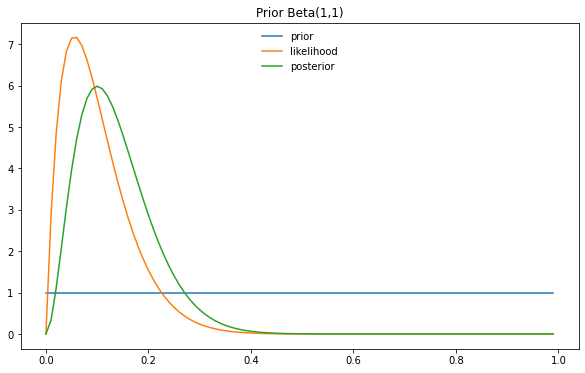

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

n = 20
p = 0.1
fig, ax = plt.subplots(1,1,figsize=(10,6))

# prior
a = 1
b = 1
beta = stats.beta(a,b)
p_range = np.arange(0, 1, 0.01)
plt.plot(p_range,beta.pdf(p_range),label='prior')

# likelihood
a = int(n*p)
b = n - a
beta = stats.beta(a,b)
p_range = np.arange(0, 1, 0.01)
plt.plot(p_range,beta.pdf(p_range),label='likelihood')

# posterior
a = int(n*p)
b = n - a
beta = stats.beta(a+1,b+1)
p_range = np.arange(0, 1, 0.01)
plt.plot(p_range,beta.pdf(p_range),label='posterior')

# plot
plt.title("Prior Beta(1,1)")
plt.legend(loc='upper center', frameon=False)
fig.show()

Exercise Ideas:
- Try other priors
  - Beta(0.5,0.5) "Jeffery's prior"
  - Beta(2,2) Looks a lot like Agresti-Coull interval calculation
  - Beta(1,1) "LaPlace prior" or Uniform
  - Beta(2,10)
  - Beta(100,100)
- Try different values for actual $p$
- Try different values for $n$
- Calculate the highest posterior density (HPD) interval from the posterior: https://en.wikipedia.org/wiki/Credible_interval
- Incorporate these learning to try and answer the question from the tweet

<a name="tldr"></a>
---
## tl;dr
A walk through of some of the common conversation regarding confidence in a simple proportion!

### (more about magic wands)
By jamming the concept standard error and variance for a proportion into a seemingly familiar formula we happen to hide a potentially interesting impossibility.  

Picture are better than words for this so let's set it up and graph it.
- n=25
  - small samples illustrate this best :)
- p = 0.025, 0.5, and 0.975
  - this gets more interesting near the edges
- plot the density of the proportion from the binomial probability mass function

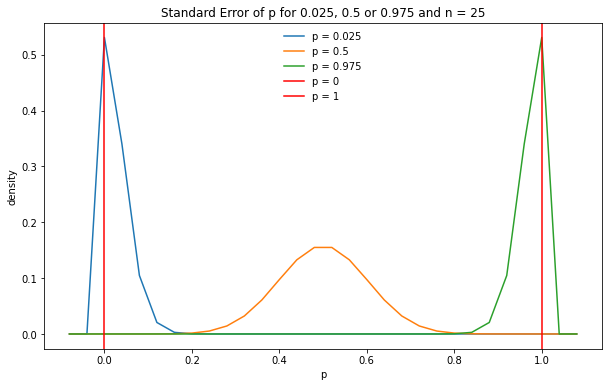

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def plot_binom(p,n):
  k = np.arange(-2,n+3,1)
  binomial = stats.binom.pmf(k,n,p)
  plt.plot(k/n,binomial,label='p = '+str(p))

n = 25
fig, ax = plt.subplots(1,1,figsize=(10,6))
for p in [0.025,0.5,0.975]:
    plot_binom(p,n)
    plt.xlabel('p')
    plt.ylabel('density')
plt.title("Standard Error of p for 0.025, 0.5 or 0.975 and n = {}".format(n))
plt.axvline(0,color='red', linestyle='-', label='p = 0')
plt.axvline(1,color='red', linestyle='-', label='p = 1')
plt.legend(loc='upper center', frameon=False)
fig.show()

**Wait** - how do we interpret p<0 and p>1?

### (Bayesian magic wands...)

A Bayesian thinks about a prior distribution here.  Most likely that means a Beta distribution in this case.  

Why Beta?

The number of tries can be broken into successes ($\alpha$) and failures ($\beta$). That makes the proportion $p = \frac{\alpha}{\alpha * \beta}$.  Hmm, that looks a lot like $p = \frac{heads}{n}$.  This is why $Beta$ is called a conjugate prior for the $p$ from the $Binomial$ distribution.

Take a look at $Beta(\alpha,\beta)$ for our example:


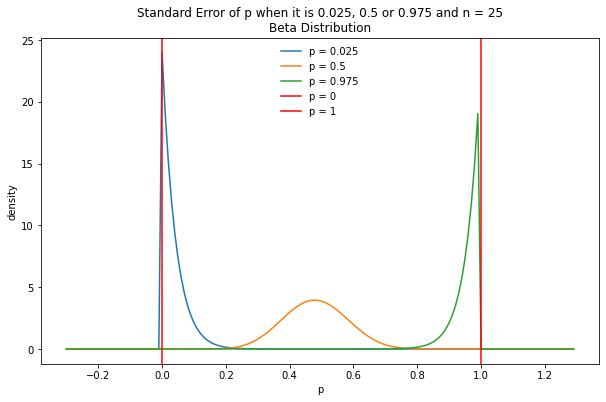

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def plot_beta(p,n):
  a = int(n*p)
  if a==0: a=1
  b = n - a
  k = np.arange(-2,n+3,1)
  beta = stats.beta(a,b)
  prange = np.arange(-.3, 1.3, 0.01)
  plt.plot(prange,beta.pdf(prange),label='p = '+str(p))

n = 25
fig, ax = plt.subplots(1,1,figsize=(10,6))
for p in [0.025,0.5,0.975]:
    plot_beta(p,n)
    plt.xlabel('p')
    plt.ylabel('density')
plt.title("Standard Error of p when it is 0.025, 0.5 or 0.975 and n = {}\nBeta Distribution".format(n))
plt.axvline(0,color='red', linestyle='-', label='p = 0')
plt.axvline(1,color='red', linestyle='-', label='p = 1')
plt.legend(loc='upper center', frameon=False)
fig.show()

Very nice! It behaves

If start with an uninformed prior, equal belief in success and failure then we call that $Beta(1,1)$ and it has a fancy name - **the Laplace Prior** which happens to be the uniform distribution. A good starting point for reading [about priors](https://en.wikipedia.org/wiki/Beta_distribution#Bayesian_inference).

Take a look at $Beta(\alpha+1,\beta+1)$ for our example:

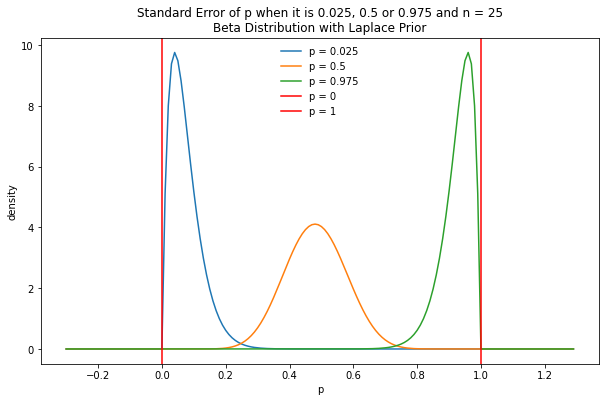

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def plot_beta(p,n):
  a = int(n*p)
  if a==0: a=1
  b = n - a
  k = np.arange(-2,n+3,1)
  beta = stats.beta(a+1,b+1) # add laplace prior Beta(1,1)
  prange = np.arange(-.3, 1.3, 0.01)
  plt.plot(prange,beta.pdf(prange),label='p = '+str(p))

n = 25
fig, ax = plt.subplots(1,1,figsize=(10,6))
for p in [0.025,0.5,0.975]:
    plot_beta(p,n)
    plt.xlabel('p')
    plt.ylabel('density')
plt.title("Standard Error of p when it is 0.025, 0.5 or 0.975 and n = {}\nBeta Distribution with Laplace Prior".format(n))
plt.axvline(0,color='red', linestyle='-', label='p = 0')
plt.axvline(1,color='red', linestyle='-', label='p = 1')
plt.legend(loc='upper center', frameon=False)
fig.show()

Even a lack of information is informative!

Now imagine perfect information, a prior that is exactly right and based on a 10x larger sample:

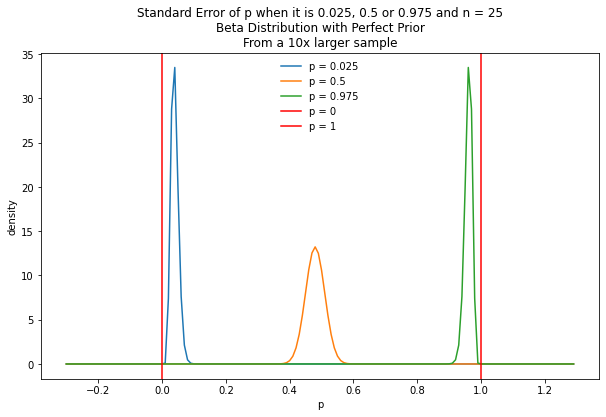

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def plot_beta(p,n):
  a = int(n*p)
  if a==0: a=1
  b = n - a
  k = np.arange(-2,n+3,1)
  beta = stats.beta(a+a*10,b+b*10) # add the perfect prior from a 10x larger sample
  prange = np.arange(-.3, 1.3, 0.01)
  plt.plot(prange,beta.pdf(prange),label='p = '+str(p))

n = 25
fig, ax = plt.subplots(1,1,figsize=(10,6))
for p in [0.025,0.5,0.975]:
    plot_beta(p,n)
    plt.xlabel('p')
    plt.ylabel('density')
plt.title("Standard Error of p when it is 0.025, 0.5 or 0.975 and n = {}\nBeta Distribution with Perfect Prior\nFrom a 10x larger sample".format(n))
plt.axvline(0,color='red', linestyle='-', label='p = 0')
plt.axvline(1,color='red', linestyle='-', label='p = 1')
plt.legend(loc='upper center', frameon=False)
fig.show()

### Can you trust the intervals stated confidence level?  
Back to the normal approximation interval: when we create a 95% confidence interval for $p$, how often does the interval for estimated p cover (include) the actual $p$:

Text(0.5, 1.0, 'Simulating the Coverage Probability\nfor a 95% Confidence Interval\nfor a proportion p = 0.1')

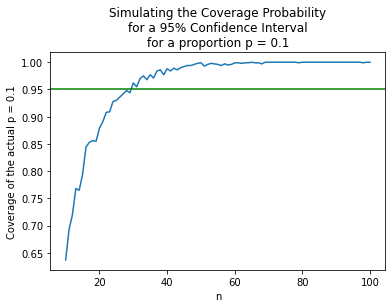

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

sims = 1000
p = 0.1
n = []
coverage = []
for sample in range(10,101):
  heads = stats.binom.rvs(sample,p,size=sims)
  p_est = heads/sample
  Lcovered = p > p_est - 1.96 * np.sqrt(p_est * (1 - p_est))
  Ucovered = p < p_est + 1.96 * np.sqrt(p_est * (1 - p_est))
  n.append(sample)
  coverage.append(np.count_nonzero((Lcovered == True) == (Ucovered == True))/sims)
  
plt.plot(n,coverage)
plt.xlabel('n')
plt.ylabel('Coverage of the actual p = {}'.format(p))
plt.axhline(0.95,color='green', linestyle='-')
plt.title("Simulating the Coverage Probability\nfor a 95% Confidence Interval\nfor a proportion p = {}".format(p))


### Further Reading

- Shameless plug for the authors other work on this topic: https://www.jstor.org/stable/2685698?seq=1

- An amazing blog post on this topic: https://www.countbayesie.com/blog/2021/4/27/technically-wrong-when-bayesian-and-frequentist-methods-differ

- This wiki and its listed references: https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval